# Applied Data Science - Final Capstone 
This is the capstone for applied data science course on Coursera. I will work on Chinatown Study in the USA.

# Table of contents
* [Introduction and background](#introduction)
* [Data](#data)
* [Analysis](#analysis)
* [Conclusion](#conclusion)

## 1. Description of the problem and a discussion of the background <a name="introduction"></a>

Chinatowns are cities within cities: adventurous, bustling, full of distinctive signage, street vendors selling unusual items, specialty shops, a noted lack of big chains, a variety of dialects being spoken, and multitudes of unique and exciting food choices.

The Chinese have been established in the United States since the mid-19th century, when laborers were needed for gold mining and railroad work, but the immigrant population also grew during the 1990s and 2000s; in fact, more than one-third of the Chinese immigrants now living in the U.S. arrived in 2000 or later. Currently, there are more than 3 million Chinese in America, according to the 2008 census report. Whether leaving China for issues ranging from poverty, famine or political reasons, across the decades, the Chinese have built strong communities that keep their ethnic heritage and shared identity; this maintained and rich culture is a defining reason that Chinatowns endure and why they're so appealing for residents and tourists alike.

Around the globe, there are Chinatowns in many major cities, from London (Europe's largest) to Vancouver (Canada's largest), Melbourne to Manila; and fortunately for us, there are many within the United States.Many of these districts share their community with other immigrant cultures, making the sights, sounds and eating choices that much more exotic. In a neighborhood where English is not the primary language, a visitor can feel as though they've left the U.S. altogether — and now they are the foreigner, a tourist in their own city. 

**So what exactly makes a Chinatown great?**

In order to compile my capstone, I will took a look at Top10 in America, and analysis the quality of authentic dining options, size, cultural experiences available, and whether a visitor will feel like they've left the United States as they explore the neighborhood.

## 2. Data <a name="data"></a>

### 2.1 Get the City List
I use a list from USA today for my research items. They offer us a top10 list for Chinatowns in the United States. I will exploare the all the Top 10 Chinatowns and compare them from all the aspects.

> - San Francisco
> - New York City
> - Chicago
> - Seattle
> - Philadelphia
> - Honolulu
> - Boston
> - Los Angeles
> - Dallas
> - Washington, D.C.
 
List Scoure from here: https://www.usatoday.com/story/travel/destinations/2014/03/08/chinatown-chinese-asian-food/6173601/



### 2.2 Get the City ChinaTown Geo Data
I will use the Geocoder Python package to get the latitude and longitude values data of ChinaTown in each city.
Data from: https://geocoder.readthedocs.io/index.html.

### 2.3 Explore the neighborhoods using Foursquare API
Lastly, I will utilize the Foursquare API to explore the ChinaTown neighborhoods and analysis them. I will get the top 1000 venues that are in ChinaTown within a radius of 1000 or 2000 meters. 

The following analysis will be performed by using the data we get:
- Analysis the quality of authentic dining options, size, cultural experiences
- Analysis the venues between Restaurant and other catalogs.
- Find the most similar ChinaTowns among those ten cities.

## 3. Analysis <a name="analysis"></a>
### 3.1 Get city list, and Chinatown address

In [1]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import pandas as pd
City_List = ['San Francisco',  'New York City',  'Chicago',  'Seattle',  'Philadelphia',
 'Honolulu',  'Boston',  'Los Angeles',  'Dallas',  'Washington, D.C.']
df_Chinatown = pd.DataFrame(City_List, columns =['CityName'])
df_Chinatown['Chinatown_address'] = "Chinatown, " + df_Chinatown['CityName'] 
df_Chinatown

,CityName,Chinatown_address
0,San Francisco,"Chinatown, San Francisco"
1,New York City,"Chinatown, New York City"
2,Chicago,"Chinatown, Chicago"
3,Seattle,"Chinatown, Seattle"
4,Philadelphia,"Chinatown, Philadelphia"
5,Honolulu,"Chinatown, Honolulu"
6,Boston,"Chinatown, Boston"
7,Los Angeles,"Chinatown, Los Angeles"
8,Dallas,"Chinatown, Dallas"
9,"Washington, D.C.","Chinatown, Washington, D.C."


### 3.2 Using Geolocator get Chinatown latitude and longitude in each city

In [2]:
Lat_list=[]
Log_list=[]
for ind, row in df_Chinatown.iterrows():
    geolocator = Nominatim(user_agent = "ChinaTown_explorer")
    address = row['Chinatown_address']
    location = geolocator.geocode(address)
    Lat_list.append(location.latitude)
    Log_list.append(location.longitude)
df_Chinatown['Lat'] = Lat_list
df_Chinatown['Lon'] = Log_list
df_Chinatown

,CityName,Chinatown_address,Lat,Lon
0,San Francisco,"Chinatown, San Francisco",37.794301,-122.406376
1,New York City,"Chinatown, New York City",40.716491,-73.996250
2,Chicago,"Chinatown, Chicago",41.851658,-87.633138
3,Seattle,"Chinatown, Seattle",47.599226,-122.323447
4,Philadelphia,"Chinatown, Philadelphia",39.953446,-75.154622
5,Honolulu,"Chinatown, Honolulu",21.312903,-157.862800
6,Boston,"Chinatown, Boston",42.351329,-71.062623
7,Los Angeles,"Chinatown, Los Angeles",34.063840,-118.235868
8,Dallas,"Chinatown, Dallas",32.953118,-96.728050
9,"Washington, D.C.","Chinatown, Washington, D.C.",38.900342,-77.021443


Plot them in a map

In [3]:
import matplotlib.pyplot as plt 
import folium
from branca.element import Figure

#### Draw Map of Chinatown in US Continent

In [4]:
map_chinatown = folium.Map(location=[37.0902, -95.7129], zoom_start=4, width=800, height=400)
df_Chinatown.apply(lambda row:folium.CircleMarker(location=[row['Lat'], row['Lon']], radius=10, fill_color='red').add_to(map_chinatown), axis=1)
fig = Figure(width=800, height=400)
fig.add_child(map_chinatown)
fig

#### Draw Map of Chinatown in Hawaii

In [5]:
map_honolulu = folium.Map(location=[21.3069, -157.8583], zoom_start=6, width=400, height=300)
folium.CircleMarker(location=[df_Chinatown.iloc[5]['Lat'], df_Chinatown.iloc[5]['Lon']], radius=10, fill_color='red').add_to(map_honolulu)
fig_honolulu = Figure(width=400, height=300)
fig_honolulu.add_child(map_honolulu)
fig_honolulu

### 3.3 Get Four square Data for each Address, 100 venues per place, 1000m radius

In [6]:
import requests # library to handle requests
CLIENT_ID = '******' # your Foursquare ID
CLIENT_SECRET = '******' # your Foursquare Secret
VERSION = '20210424' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius_size = 1000

In [7]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)   
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [8]:
Chinatown_venues = getNearbyVenues(names = df_Chinatown['Chinatown_address'], latitudes = df_Chinatown['Lat'], longitudes = df_Chinatown['Lon'], radius= radius_size)
Chinatown_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Chinatown, San Francisco",37.794301,-122.406376,Blue Bottle Coffee,37.792771,-122.404833,Coffee Shop
1,"Chinatown, San Francisco",37.794301,-122.406376,Red Blossom Tea Company,37.794643,-122.406379,Tea Room
2,"Chinatown, San Francisco",37.794301,-122.406376,Hinodeya,37.794656,-122.404544,Ramen Restaurant
3,"Chinatown, San Francisco",37.794301,-122.406376,Old Saint Mary's Cathedral (Old Cathedral of S...,37.792772,-122.405910,Church
4,"Chinatown, San Francisco",37.794301,-122.406376,Yi Fang Taiwan Fruit Tea,37.795038,-122.407614,Bubble Tea Shop


### 3.4  Check the dataframe size, venues number

In [9]:
Chinatown_venues.shape

(961, 7)

### Find out how many unique categories can be curated from all the returned venues

In [10]:
print('There are {} uniques categories.'.format(len(Chinatown_venues['Venue Category'].unique())))


There are 210 uniques categories.


### 3.5 Analyze Each Chinatown

In [11]:
import numpy as np
# one hot encoding
chinatown_onehot = pd.get_dummies(Chinatown_venues['Venue Category'], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chinatown_onehot['Neighborhood'] = Chinatown_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [chinatown_onehot.columns[-1]] + list(chinatown_onehot.columns[:-1])
chinatown_onehot = chinatown_onehot[fixed_columns]

chinatown_onehot.head()

,Yoga Studio,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Automotive Shop,...,Travel Lounge,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Group rows by city and by taking the mean of the frequency of occurrence of each category

In [12]:
chinatown_grouped = chinatown_onehot.groupby('Neighborhood').mean().reset_index()
chinatown_grouped

,Neighborhood,Yoga Studio,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,...,Travel Lounge,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,"Chinatown, Boston",0.00,0.010000,0.00,0.00,0.00,0.040000,0.00,0.00,0.00,...,0.00,0.00,0.01,0.00,0.010000,0.00,0.00,0.01,0.00,0.00
1,"Chinatown, Chicago",0.00,0.000000,0.00,0.00,0.00,0.040000,0.01,0.00,0.00,...,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.01,0.00
2,"Chinatown, Dallas",0.00,0.016393,0.00,0.00,0.00,0.016393,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.016393,0.00,0.00,0.00,0.00,0.00
3,"Chinatown, Honolulu",0.00,0.050000,0.01,0.00,0.00,0.010000,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.020000,0.00,0.01,0.00,0.00,0.00
4,"Chinatown, Los Angeles",0.00,0.000000,0.03,0.00,0.00,0.010000,0.00,0.00,0.00,...,0.01,0.00,0.00,0.00,0.040000,0.00,0.00,0.00,0.00,0.01
5,"Chinatown, New York City",0.01,0.010000,0.00,0.00,0.00,0.020000,0.00,0.01,0.01,...,0.00,0.00,0.02,0.00,0.000000,0.00,0.04,0.02,0.00,0.01
6,"Chinatown, Philadelphia",0.00,0.000000,0.00,0.01,0.00,0.020000,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.010000,0.00,0.00,0.00,0.00,0.00
7,"Chinatown, San Francisco",0.01,0.020000,0.00,0.00,0.01,0.000000,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.010000,0.01,0.03,0.00,0.00,0.00
8,"Chinatown, Seattle",0.00,0.000000,0.00,0.01,0.00,0.000000,0.00,0.00,0.00,...,0.00,0.00,0.00,0.01,0.110000,0.00,0.01,0.00,0.00,0.00
9,"Chinatown, Washington, D.C.",0.00,0.070000,0.00,0.02,0.00,0.010000,0.00,0.00,0.00,...,0.00,0.01,0.02,0.00,0.000000,0.00,0.00,0.01,0.00,0.00


### Print each chinatown along with the top 5 most common venues

In [13]:
num_top_venues = 5

for hood in chinatown_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = chinatown_grouped[chinatown_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Chinatown, Boston----
                venue  freq
0  Chinese Restaurant  0.08
1              Bakery  0.06
2         Coffee Shop  0.05
3      Sandwich Place  0.04
4    Asian Restaurant  0.04


----Chinatown, Chicago----
                venue  freq
0  Chinese Restaurant  0.22
1         Pizza Place  0.05
2    Asian Restaurant  0.04
3  Mexican Restaurant  0.03
4   Korean Restaurant  0.03


----Chinatown, Dallas----
                      venue  freq
0        Chinese Restaurant  0.11
1         Indian Restaurant  0.07
2              Burger Joint  0.05
3  Mediterranean Restaurant  0.05
4               Coffee Shop  0.05


----Chinatown, Honolulu----
                 venue  freq
0               Bakery  0.07
1          Coffee Shop  0.06
2  American Restaurant  0.05
3   Chinese Restaurant  0.05
4             Pharmacy  0.04


----Chinatown, Los Angeles----
                venue  freq
0  Chinese Restaurant  0.11
1  Mexican Restaurant  0.08
2      Sandwich Place  0.05
3         Coffee Shop  0.05


### Put the data into pandas frame

In [14]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [15]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns_name = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns_name.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns_name.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns_name, dtype=object)
neighborhoods_venues_sorted['Neighborhood'] = chinatown_grouped['Neighborhood']

for ind in np.arange(chinatown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chinatown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Chinatown, Boston",Chinese Restaurant,Bakery,Coffee Shop,Asian Restaurant,Sandwich Place,Performing Arts Venue,Park,Theater,Hotel,Seafood Restaurant
1,"Chinatown, Chicago",Chinese Restaurant,Pizza Place,Asian Restaurant,Mexican Restaurant,Korean Restaurant,Rental Car Location,Thai Restaurant,Bakery,Bubble Tea Shop,Storage Facility
2,"Chinatown, Dallas",Chinese Restaurant,Indian Restaurant,Coffee Shop,Mediterranean Restaurant,Burger Joint,Café,Thai Restaurant,Noodle House,Bubble Tea Shop,Convenience Store
3,"Chinatown, Honolulu",Bakery,Coffee Shop,American Restaurant,Chinese Restaurant,Pharmacy,Café,Dessert Shop,Japanese Restaurant,Pizza Place,Shopping Mall
4,"Chinatown, Los Angeles",Chinese Restaurant,Mexican Restaurant,Coffee Shop,Sandwich Place,Bakery,Historic Site,Vietnamese Restaurant,Plaza,Art Gallery,Café
5,"Chinatown, New York City",Bakery,Cocktail Bar,Sandwich Place,Chinese Restaurant,Ice Cream Shop,Wine Bar,Mexican Restaurant,Coffee Shop,Thai Restaurant,Pizza Place
6,"Chinatown, Philadelphia",Chinese Restaurant,Bakery,Sandwich Place,History Museum,Coffee Shop,Hotel,Tea Room,Restaurant,Shanghai Restaurant,Brewery
7,"Chinatown, San Francisco",Coffee Shop,Pizza Place,Cocktail Bar,Hotel,New American Restaurant,Bakery,Chinese Restaurant,Men's Store,Sushi Restaurant,Restaurant
8,"Chinatown, Seattle",Vietnamese Restaurant,Chinese Restaurant,Coffee Shop,Cocktail Bar,Japanese Restaurant,Pizza Place,Café,Thrift / Vintage Store,Bubble Tea Shop,Tea Room
9,"Chinatown, Washington, D.C.",American Restaurant,Hotel,Pizza Place,Cocktail Bar,Italian Restaurant,Theater,Mediterranean Restaurant,Salad Place,Indian Restaurant,Plaza


### 3.6 Overall Venue Analysis 
Find which venue has most in all the Chinatown

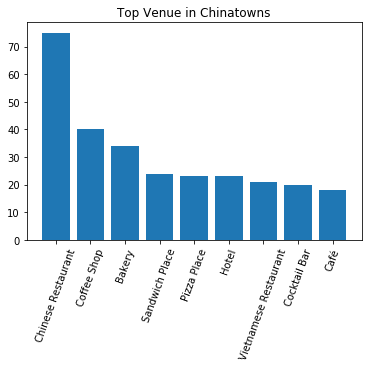

In [16]:
venue_count = Chinatown_venues['Venue Category'].value_counts()
venue_count_frame = venue_count.to_frame()
venue_count_frame['name'] = venue_count_frame.index
plt.bar(venue_count_frame.iloc[0:9, 1], venue_count_frame.iloc[0:9, 0])
plt.title('Top Venue in Chinatowns')
plt.xticks(rotation=70)
plt.show()


### 3.7 Cluster Chinatown
Run _k_-means to cluster the Chinatown into 3 clusters.


In [19]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 3

chinatown_grouped_clustering = chinatown_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chinatown_grouped_clustering)

df_Chinatown['Cluster Label'] = kmeans.labels_
df_Chinatown

,CityName,Chinatown_address,Lat,Lon,Cluster Label
0,San Francisco,"Chinatown, San Francisco",37.794301,-122.406376,0
1,New York City,"Chinatown, New York City",40.716491,-73.996250,2
2,Chicago,"Chinatown, Chicago",41.851658,-87.633138,0
3,Seattle,"Chinatown, Seattle",47.599226,-122.323447,0
4,Philadelphia,"Chinatown, Philadelphia",39.953446,-75.154622,0
5,Honolulu,"Chinatown, Honolulu",21.312903,-157.862800,1
6,Boston,"Chinatown, Boston",42.351329,-71.062623,0
7,Los Angeles,"Chinatown, Los Angeles",34.063840,-118.235868,1
8,Dallas,"Chinatown, Dallas",32.953118,-96.728050,0
9,"Washington, D.C.","Chinatown, Washington, D.C.",38.900342,-77.021443,1


### 3.8 Plot the map with clustering result


In [20]:
rainbow = ['red','blue','green']

map_chinatown_cluster = folium.Map(location=[37.0902, -95.7129], zoom_start=4, width=800, height=400)
markers_colors = []

for lat, lon, poi, cluster in zip(df_Chinatown['Lat'], df_Chinatown['Lon'], df_Chinatown['Chinatown_address'], df_Chinatown['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_chinatown_cluster)
fig = Figure(width=800, height=400)
fig.add_child(map_chinatown_cluster)
fig

#### Honolulu Map

In [21]:
map_honolulu_cluster = folium.Map(location=[21.3069, -157.8583], zoom_start=6, width=400, height=300)
folium.CircleMarker(location=[df_Chinatown.iloc[5]['Lat'], df_Chinatown.iloc[5]['Lon']], radius=10, fill_color='blue').add_to(map_honolulu)
fig_honolulu = Figure(width=400, height=300)
fig_honolulu.add_child(map_honolulu)
fig_honolulu

## 4 Conclusion <a name="conflusion"></a>
In this project, we analsis the venue in each Chinatown and clustering them into three group.
The culinary aspect of a Chinatown is undoubtedly its biggest attraction for visitors; the chance to try an exotic new ingredient or to go back for a dish that can never quite be replicated at home. From dim sum palaces to hole-in-the-wall joints, one can find any Chinese food they're looking for, and (given the enormous menus at some restaurants) many more they're not. So let's put on our walking shoes, because there's much to be explored!

Zetong Gu 2021.04.25